<b><center>Mutational Graph library</b></center><br>
First cell load all the needed libraries and functions

In [2]:
from libs.Functions_For_MutationalGraphs import *

# percent of alt alleles to add mutation label
# File containing label
# Default is AminoAcid labele for non synonymous mutations
def_min_val_label(15)
load_mut_names("libs/Mut_Nuc_AA_ORF.dic")

Var file format is a tab seprated file that should have :<br>
 - A fix header :<br>
 - All positions 1 to 29903 as first field of each line
 - The reference allele from the wuhan sequence as seconde filed
 - The number of each possible allele summing to the number of sanple for each line :<br>


<p style="font-family:'Lucida Console', monospace"><pre>
POS   REF  A    C    G    T    -    N
1     A    100  0    0    0    0    0
2     T    0    0    0    100  0    0
3     T    0    0    0    100  0    0
             (...)
3495  A    100  0    0    0    0    0
3496  G    0    0    100  99   1    0
3497  G    0    0    100  0    0    0
3498  C    0    27   0    0    0   73
3499  T    0    0    0    100  0    0
3500  A    100  0    0    0    0    0
</pre></p>

In [3]:
############################################################
####### This is a toy example with fake data ###############
#### Duplicate this cell and make your own graph ###########
############################################################

# The list of names will only be used as legend on the y axis
namelist=['Data'+str(i) for i in [1,2,3]]

# The list of path have to point on valid varfiles  (see definition above)
pathlist=["libs/fake"+i+".mutationalGraph.var" for i in namelist]

# Load of the files and transform it o a table list
tablelist=openfiles(pathlist)

# Create the list of position of interest using 
# - percentmin: alternative allele frequency have to be above this threshold in one of the table
# - addmissing: if true, consider missing data as an alternative allele
poslist=getpositions(tablelist,percentmin=25,addmissing=False)


# You may filter some positions here
poslist=[i for i in poslist if i>50 and i<29950]

# Finally plot the data
# - mytitle will be on the legend
# - addtotal will add as first line the sum of all the libraries
# - pdfname pdf file with the given name will be created
bighist(tablelist,poslist,namelist,mytitle="test",addtotal=False,PDFname="")


KeyError: '-'

In [ ]:
def sumperline(t):
    return(t[set(t.columns)-set(['POS', 'REF'])].sum(axis=1))


def addpos(ref,alt,all_bottoms,axx,all_pos_toplot,x_names):
    if ref in ["A","C","G","T"]:
        all_pos_toplot[all_pos_toplot['REF'] != ref] = 0
    values=all_pos_toplot[alt]/sumperline(all_pos_toplot)*100
    axx.bar(x_names, values,
            bottom=all_bottoms,
            color=get_col(ref,alt),
            edgecolor="none",width=1)
    for j in range(len(values)):
        if values.iloc[j]>min_val_AAlabel and alt!="-":
            if ref+">"+alt in ["T>A","G>A","T>C"]:
                autolabel(axx,j,getMut(all_pos_toplot.iloc[j]["POS"],alt),"lightgrey")
            else: autolabel(axx,j,getMut(all_pos_toplot.iloc[j]["POS"],alt),"black")
    return values
    
    
def bighist(tablelist,poslist,y_names,mytitle="",suptables=[],PDFname=""):
    
    fig = plt.figure(figsize=(len(poslist)/3+5,2*(len(tablelist)+len(suptables))), constrained_layout=False)
    ax = fig.add_gridspec(nrows=len(tablelist)+len(suptables)+1, ncols=1, hspace=0).subplots(sharex=True)
    x_names=[str(i) for i in poslist]
    n_table=len(tablelist)
    for i in range(len(suptables)):
        ax[i].bar(x_names , suptables[i] , color="grey" , edgecolor="none" , width=1)
    for i in range(n_table):
        axx=ax[i+len(suptables)]
        nb_sample=sum(tablelist[i].iloc[0][["A","C","G","T","-","N"]])
        if nb_sample>2:
            if nb_sample<10000:
                str_nb_sample="\nn="+str(nb_sample)+""
            else:
                str_nb_sample="\nn="+str(int(nb_sample/1000))+"K"
        else :
            str_nb_sample=""
        axx.set(yticks=[25,50,75])
        axx.set_ylabel(y_names[i]+str_nb_sample,  fontsize=15)
        axx.set_ylim((0,100))
        axx.margins(0, 0)  
        all_pos_toplot=tablelist[i].loc[tablelist[i]["POS"].isin(poslist)]
        all_bottoms=all_pos_toplot['A']-all_pos_toplot['A']
        all_bottoms+=addpos("*","-",all_bottoms,axx,all_pos_toplot,x_names)
        #loop in all the 12 combinaisons:
        for ref in ["A","C","G","T"]:
            for alt in ["A","C","G","T"]:
                if alt!=ref:
                    values=addpos(ref,alt,all_bottoms,axx,all_pos_toplot,x_names)
                    all_bottoms+=values
            values=addpos(ref,ref,all_bottoms,axx,all_pos_toplot,x_names)
            all_bottoms+=values
            values=addpos(ref,"N",all_bottoms,axx,all_pos_toplot,x_names)
    ax_last=ax[n_table+len(suptables)]
    addgenenames(ax_last,x_names)
    ax_last.tick_params(axis='x',bottom=True,labelrotation=90, labelsize=20)
    legend=[mpatches.Patch(color=label_color[i], label=i.replace("T","U")) for i in label_color]
    fig.legend(handles=legend,loc='center right',title=mytitle, bbox_to_anchor=(1.05, 0.5))
    fig.subplots_adjust(right=0.9)
    if PDFname!="":
        fig.savefig(PDFname, bbox_inches='tight')
        
bighist(tablelist,poslist,namelist,mytitle="",PDFname="")
    

TypeError: 'AxesSubplot' object is not subscriptable

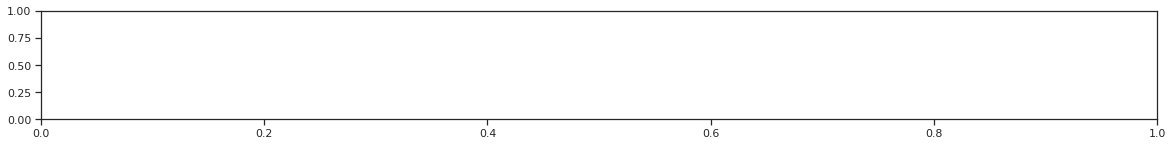

In [27]:
import random
pos=[i for i in range(100)]
f1=[random.random()/10 for i in pos]
f2=[random.random()/10 for i in pos]
f3=[1-i-j for i,j in zip(f1,f2)]
f3
fig = plt.figure(figsize=(20,2), constrained_layout=False)
ax = fig.add_gridspec(nrows=1, ncols=1, hspace=0).subplots(sharex=True)
axx=ax[0]
axx.bar(pos, f1,
        bottom=[0 for i in pos],
        color="red",
        edgecolor="none",width=1)

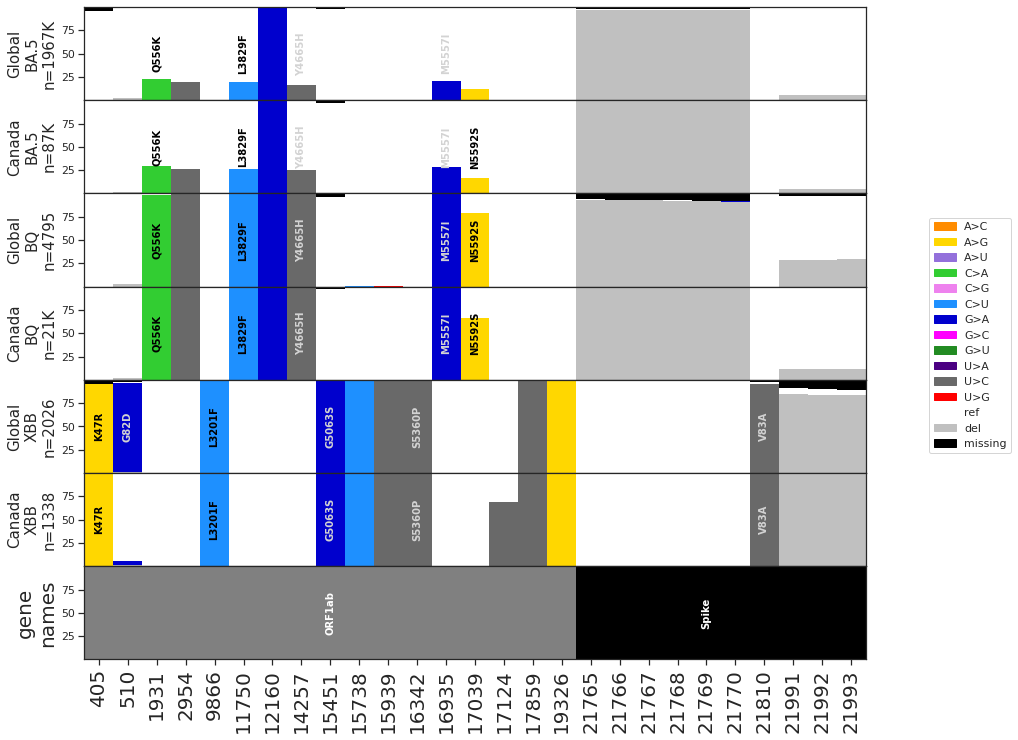

In [4]:
## An example !

p="/lustre06/project/6065672/shared/covid-19/GISAID/2023_02_10/"
namelist=["Global_BA.5","Canada_BA.5","Global_BQ","Canada_BQ","Global_XBB","Canada_XBB"]
pathlist=[p+i.replace("_","_variations_files/msaCodon_0210_")+".var" for i in namelist]

namelist=[i.replace("_","\n") for i in namelist]
tablelist=openfiles(pathlist)

pospos=[]
for t in tablelist:
    pospos+=getpositions([t],percentmin=50,addmissing=False)
poslist=[val for val,count in np.transpose(np.unique(pospos, return_counts=True)) if count!=len(pathlist)]
#poslist=getpositions(tablelist,percentmin=90,addmissing=False)

poslist=[i for i in poslist if i>50 and i<29950 and i <22000]

bighist(tablelist,poslist,namelist,mytitle="",PDFname="")
